[<img align="left" width="140px" src="https://storage.googleapis.com/static.drivetrainhub.com/img/dh_logo_text_217x80.png"/>](https://drivetrainhub.com)

<div align="right">© 2020 Drivetrain Hub LLC</div>

# Geometry / Involute
---

**Authors**:  [Chad Glinsky](https://www.linkedin.com/in/chad-glinsky-a1840b13/)

**Description**:  Mathematical review of the involute curve and its significance to mechanical gear systems.

## Table of Contents

1. [Introduction](#Introduction)
2. [Mathematics](#Mathematics)
    1. [Parametric Curve](#Parametric-Curve)
    2. [Curvature](#Curvature)
3. [Gearing](#Gearing)
    1. [Pressure Angle](#Pressure-Angle)
    2. [Involute Function](#Involute-Function)
    3. [Line of Action](#Line-of-Action)
    4. [Conjugate Action](#Conjugate-Action)
4. [References](#References)

#### Notebook imports and settings

In [1]:
%matplotlib inline
from helper import hide_toggle, round_degrees
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
from math import pi, hypot, ceil, cos
import numpy as np

# notebook modules
import involute as inv

# settings
FIGSIZE = (6, 6)  # size of plots
INTERACTIVITY = False  # static or interactive plots

In [2]:
# DEVELOPMENT USE: %autoreload 1
# PRODUCTION USE: %autoreload 0
%load_ext autoreload
%autoreload 0
%aimport involute

## Introduction

An involute, specifically a circle involute, is a geometric curve that can be described by the trace of unwrapping a taut string which is tangent to a circle, known as the base circle.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The circle involute has attributes that are critically important to the application of mechanical gears.
</div>

<img src="./img/mathworld_involute.gif" alt="Circle involute curve" style="width: 100%; max-width: 350px"/>
<p style="text-align: center; font-weight: bold;">Circle involute from an unwrapped string</p>
<span style="font-size: 8pt; float: right">Image credit: Wolfram MathWorld</span>

## Mathematics

The mathematics of a circle involute curve is reviewed here.

### Nomenclature

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$r_b$</td>
        <td style="text-align:left">Base radius</td>
    </tr>
    <tr>
        <td style="text-align:left">$\psi$</td>
        <td style="text-align:left">Roll angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$x$</td>
        <td style="text-align:left">Cartesian x-coodinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$y$</td>
        <td style="text-align:left">Cartesian y-coordinate</td>
    </tr>
    <tr>
        <td style="text-align:left">$\kappa$</td>
        <td style="text-align:left">Curvature</td>
    </tr>
    <tr>
        <td style="text-align:left">$R$</td>
        <td style="text-align:left">Radius of curvature</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha$</td>
        <td style="text-align:left">Pressure angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{inv }\alpha$</td>
        <td style="text-align:left">Involute function of pressure angle $\alpha$</td>
    </tr>
</table>

### Parametric Curve

An involute curve can be expressed by parametric equations in planar coordinates.

$$x = r_b (\cos\psi + \psi \sin\psi)$$

$$y = r_b (\sin\psi - \psi \cos\psi)$$

These equations specifically define an involute for a circle positioned at (0, 0) and the involute base starting at a polar angle of zero in the $xy$ plane

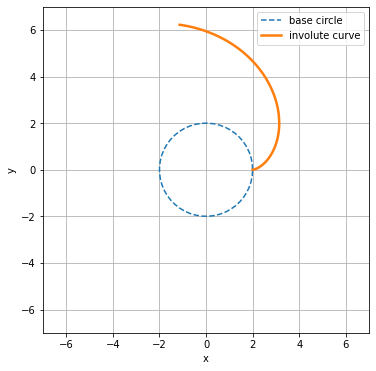

In [3]:
# interactive variable limits
r_base_lim = (1.0, 2.0)
roll_angle_lim = (0.0, 3.0)
r_max = ceil(hypot(*inv.involute_curve(max(r_base_lim), max(roll_angle_lim))))

# interactive callback function
def f(radius_base, roll_angle):
    fig = plt.figure(figsize=FIGSIZE)
    ax = fig.add_subplot(1, 1, 1)
    
    # base circle
    x, y = inv.circle_curve(radius_base, np.linspace(0, 2 * pi))
    ax.plot(x, y, '--')
    
    # involute curve
    roll_angles = np.linspace(0, roll_angle, num=100)
    x, y = inv.involute_curve(radius_base, roll_angles)
    ax.plot(x, y, '-', linewidth=2.5)
    
    # plot format
    ax.set_aspect('equal')
    plt.ylim(-r_max, r_max)
    plt.xlim(-r_max, r_max)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['base circle', 'involute curve'])
    plt.grid()
    plt.show()

if INTERACTIVITY:
    print('Slider controls only work when running Jupyter.  They do not work in an HTML view.')
    interactive(f, radius_base=r_base_lim, roll_angle=roll_angle_lim)
else:
    f(r_base_lim[-1], roll_angle_lim[-1])

### Curvature

The curvature, $\kappa$, of any point on a curve is defined as the reciprocal of the radius of curvature, $R$, at that point.  

$$\kappa = \frac{1}{R}$$

For a circle involute, the center of curvature and radius of curvature at any point is apparent based on its construction via an unwrapping string.  Center of curvature always lies on the base circle, making the radius of curvature equal to roll distance.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The curvature of an involute is an important factor in the gear tooth stresses observed in a meshing gear pair.
</div>

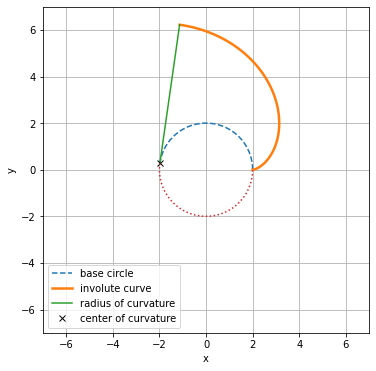

In [4]:
# interactive variable limits
r_base_lim = (1.0, 2.0)
roll_angle_lim = (0.0, 3.0)
r_max = ceil(hypot(*inv.involute_curve(max(r_base_lim), max(roll_angle_lim))))

# interactive callback function
def f(radius_base, roll_angle):
    fig = plt.figure(figsize=FIGSIZE)
    ax = fig.add_subplot(1, 1, 1)
    
    # curvature at curve endpoint
    _, _, x_ctr_k, y_ctr_k = inv.involute_curvature(radius_base, roll_angle)
    
    # base circle
    phi_endpoint = np.arctan2(y_ctr_k, x_ctr_k)
    x, y = inv.circle_curve(radius_base, np.linspace(0, phi_endpoint))
    ax.plot(x, y, '--')
    
    # involute curve
    roll_angles = np.linspace(0, roll_angle, num=100)
    x, y = inv.involute_curve(radius_base, roll_angles)
    ax.plot(x, y, '-', linewidth=2.5)
    
    # plot - radius of curvature
    ax.plot([x_ctr_k, x[-1]], [y_ctr_k, y[-1]], '-')
    
    # plot - center of curvature
    ax.plot(x_ctr_k, y_ctr_k, 'kx')
    
    # remaining base circle
    x, y = inv.circle_curve(radius_base, np.linspace(phi_endpoint, 2 * pi))
    ax.plot(x, y, ':')
    
    # plot format
    ax.set_aspect('equal')
    plt.ylim(-r_max, r_max)
    plt.xlim(-r_max, r_max)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['base circle', 'involute curve', 'radius of curvature', 'center of curvature'])
    plt.grid()
    plt.show()

if INTERACTIVITY:
    print('Slider controls only work when running Jupyter.  They do not work in an HTML view.')
    interactive(f, radius_base=r_base_lim, roll_angle=roll_angle_lim)
else:
    f(r_base_lim[-1], roll_angle_lim[-1])

## Gearing

The involute is important to mechanical gears because it enables the *transfer of mechanical power* between rotating bodies without relying on friction as the mechanism of torque transfer, such as a car tire on a road surface.  Furthermore, the rotational speed and torque can be modified during this transfer of power, enabling gear systems to change speed and torque between different points in the system.

<img src="./img/gears-app_4-speed-spur.png" alt="INVOLUTE GEARS IN 4-SPEED TRANSMISSION" style="width: 100%; max-width: 450px"/>
<p style="text-align: center; font-weight: bold;">Involute gearing modeled in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

### Pressure Angle

The pressure angle for an arbitrary point on an involute curve is the angle between its radius vector and line tangent to the involute.  As evident in the figure below, the involute base radius is related to the pressure angle at an arbiturary radius on the involute curve.

$$ r_b = r \cos\alpha $$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The pressure angle of an involute is important to how gears transfer mechanical power, including how the forces resolve on the gear teeth.
</div>

<img src="./img/drivetrainhub_involute_pressure_angle.svg" alt="Involute parameters" style="width: 100%; max-width: 400px"/>
<p style="text-align: center; font-weight: bold;">Involute curve diagram</p>

### Involute Function

The involute function is mathematically expressed as a function of pressure angle.

$$\text{inv }\alpha = \tan\alpha - \alpha$$

The involute function can also be used to express the relationship between pressure angle and roll angle.  The previous figure illustrates the involute function in the context of the roll angle and pressure angle.

$$\text{inv }\alpha = \psi - \alpha$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The involute function and its inverse are useful for calculating parameters of involute gearing, as demonstrated in other notebooks.
</div>

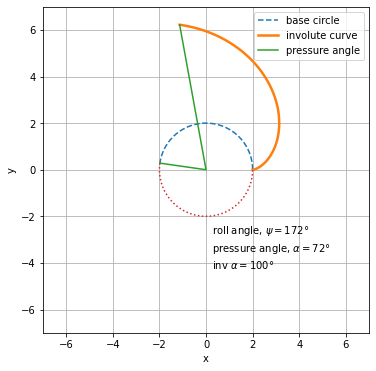

In [5]:
# interactive variable limits
r_base_lim = (1.0, 2.0)
roll_angle_lim = (0.0, 3.0)
r_max = ceil(hypot(*inv.involute_curve(max(r_base_lim), max(roll_angle_lim))))

# interactive callback function
def f(radius_base, roll_angle):
    fig = plt.figure(figsize=FIGSIZE)
    ax = fig.add_subplot(1, 1, 1)
    
    # curvature at curve endpoint
    _, _, x_ctr_k, y_ctr_k = inv.involute_curvature(radius_base, roll_angle)
    
    # base circle
    phi_endpoint = np.arctan2(y_ctr_k, x_ctr_k)
    x, y = inv.circle_curve(radius_base, np.linspace(0, phi_endpoint))
    ax.plot(x, y, '--')
    
    # involute curve
    roll_angles = np.linspace(0, roll_angle, num=100)
    x, y = inv.involute_curve(radius_base, roll_angles)
    ax.plot(x, y, '-', linewidth=2.5)
    
    # pressure angle polar lines
    ax.plot([x_ctr_k, 0, x[-1]], [y_ctr_k, 0, y[-1]], '-')
    
    # remaining base circle
    x, y = inv.circle_curve(radius_base, np.linspace(phi_endpoint, 2 * pi))
    ax.plot(x, y, ':')
    
    # text - pressure angle, involute fcn
    alpha = inv.involute_pressure_angle(radius_base, roll_angle)
    inv_alpha = inv.involute_function(alpha)
    y_text_base = -r_base_lim[-1] - .75
    plt.text(.25, y_text_base, r'roll angle, $\psi=$' + f'{round_degrees(roll_angle)}$\degree$')
    plt.text(.25, y_text_base - .75, r'pressure angle, $\alpha=$' + f'{round_degrees(alpha)}$\degree$')
    plt.text(.25, y_text_base - 2 * .75, r'inv $\alpha = $' + f'{round_degrees(inv_alpha)}$\degree$')
    
    # plot format
    ax.set_aspect('equal')
    plt.ylim(-r_max, r_max)
    plt.xlim(-r_max, r_max)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['base circle', 'involute curve', 'pressure angle',])
    plt.grid()
    plt.show()

if INTERACTIVITY:
    print('Slider controls only work when running Jupyter.  They do not work in an HTML view.')
    interactive(f, radius_base=r_base_lim, roll_angle=roll_angle_lim)
else:
    f(r_base_lim[-1], roll_angle_lim[-1])

### Line of Action

The line of action refers to the line along which force is applied during the mating of involutes, such as meshing spur gears.  This line is also be referred to as the *pressure line* or *generating line*.  To understand the line of action, we must introduce the *pitch circle* and *pitch point*.

**Pitch circle:** Circle along which the involute body, e.g. gear, rotates without slip with a mating involute body.

**Pitch point:** Point along the line of action that intersects the pitch circle.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    In the case of helical gearing, a <b>plane of action</b> must be considered since the involute teeth vary along the gear facewidth, causing the pressure angle at each point of contact to differ.  For spur gearing, a plane of action also exists, but its involute teeth do not vary along the facewidth.<sup>&#10013;</sup><br>
    <br>
    <small>&#10013; Ignoring any microgeometry modifications.</small>
</div>

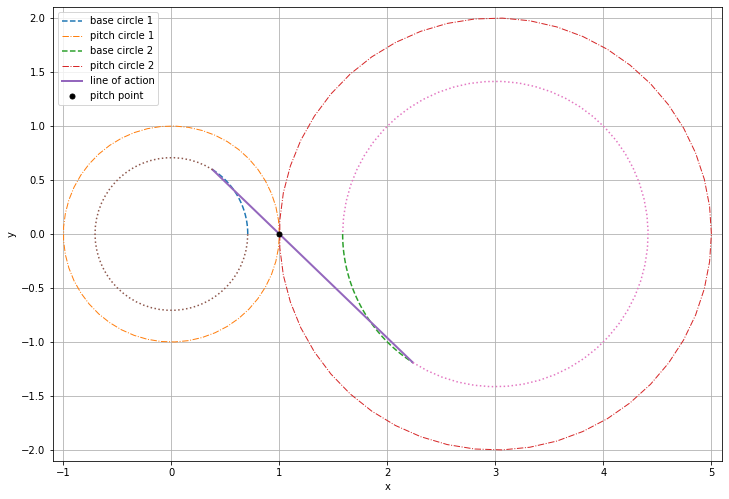

In [6]:
# interactive variable limits
gear_ratio_lim = (1.0, 2.0)
pressure_angle_lim = (0.0, pi / 4)

# fixed params
r_pitch1 = 1
phi_circle = np.linspace(0, 2 * pi)

# interactive callback function
def f(gear_ratio, pressure_angle):
    fig = plt.figure(figsize=[2 * x for x in FIGSIZE])
    ax = fig.add_subplot(1, 1, 1)
    
    # common params
    roll_angle = pressure_angle + inv.involute_function(pressure_angle)
    
    # gear 1 params
    r_base1 = r_pitch1 * cos(pressure_angle)
    x_center1 = 0
    y_center1 = 0
    
    # gear 2 params
    r_pitch2 = gear_ratio * r_pitch1
    r_base2 = r_pitch2 * cos(pressure_angle)
    center_distance = r_pitch1 + r_pitch2
    x_center2 = x_center1 + center_distance
    y_center2 = y_center1
    
    # plot - gear1 base circle
    phi_roll1 = np.linspace(0, roll_angle)
    x_b1, y_b1 = inv.circle_curve(r_base1, phi_roll1, x_center1, y_center1)
    ax.plot(x_b1, y_b1, '--')
    
    # plot - gear1 pitch circle
    x, y = inv.circle_curve(r_pitch1, phi_circle, x_center1, y_center1)
    ax.plot(x, y, '-.', linewidth=1)
    
    # plot - gear2 base circle
    phi_roll2 = np.linspace(pi, pi + roll_angle)
    x_b2, y_b2 = inv.circle_curve(r_base2, phi_roll2, x_center2, y_center2)
    ax.plot(x_b2, y_b2, '--')
    
    # plot - gear2 pitch circle
    x, y = inv.circle_curve(r_pitch2, phi_circle, x_center2, y_center2)
    ax.plot(x, y, '-.', linewidth=1)
    
    # plot - line of action
    ax.plot((x_b1[-1], x_b2[-1]), (y_b1[-1], y_b2[-1]), linewidth=2)
    
    # plot - pitch point
    ax.plot(r_pitch1, 0, 'k.', markersize=10)
    
    # plot - gear1 remaining base circle
    x1, y1 = inv.circle_curve(r_base1, np.linspace(phi_roll1[-1], 2 * pi), x_center1, y_center1)
    ax.plot(x1, y1, ':')
    
    # plot - gear2 remaining base circle
    x2, y2 = inv.circle_curve(r_base2, np.linspace(phi_roll2[-1], 2 * pi + pi), x_center2, y_center2)
    ax.plot(x2, y2, ':')
    
    # plot format
    ax.set_aspect('equal')
    dlim = r_pitch1 * 0.1
    plt.ylim(-r_pitch2 - dlim, r_pitch2 + dlim)
    plt.xlim(-r_pitch1 - dlim, center_distance + r_pitch2 + dlim) 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['base circle 1', 'pitch circle 1', 'base circle 2', 'pitch circle 2', 'line of action', 'pitch point'], loc='upper left')
    plt.grid()
    plt.show()

if INTERACTIVITY:
    print('Slider controls only work when running Jupyter.  They do not work in an HTML view.')
    interactive(f, gear_ratio=gear_ratio_lim, pressure_angle=pressure_angle_lim)
else:
    f(gear_ratio_lim[-1], pressure_angle_lim[-1])

### Conjugate Action

A key characterstic of involute gearing is *conjugate action*.  Conjugate action results in a constant, i.e. non-flucuating, angular velocity relationship between the two rotating bodies involved.  In the case of involute gearing, this constant angular velocity relationship corresponds to the gear ratio.

A gear pair with mating involute curves achieves conjugate action if the gear teeth have perfect involute geometry and are completely rigid and smooth.  The animation below illustrates how the point of contact moves along the line of action for mating involute curves with conjugate action.

<img src="./img/gears-app_line-of-action.gif" alt="Involute parameters" style="width: 100%; max-width: 350px"/>
<p style="text-align: center; font-weight: bold;">Gear mesh line of action in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    Actual gears are never manufactured with perfect involutes, and therefore nominal conjugate action is <i>not</i> achieved.  In this case, the two gear bodies will have an angular velocity that fluctuates about its nominal constant value.
</div>

The figure below provides a *qualitative* demonstratration of the influence of imperfect involute geometry on the conjugate action of a gear mesh.

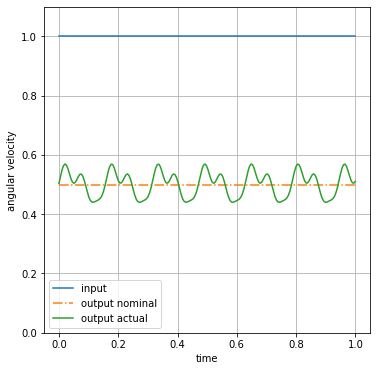

In [7]:
# interactive variable limits
imperfection_lim = (0.0, 1.0)

# fixed params
ratio = 2  # w_in / w_out
w_in = 1  # input angular velocity
xlim = [0, 1]  # duration
x = np.linspace(*xlim, num=200)

# interactive callback function
def f(imperfection):
    fig = plt.figure(figsize=FIGSIZE)
    ax = fig.add_subplot(1, 1, 1)
    
    imperfection *= 0.1
    
    # input angular velocity
    ax.plot(xlim, [w_in, w_in], '-')
    
    # nominal output angular velocity (conjugate action)
    w_out_nom = w_in / ratio
    ax.plot(xlim, [w_out_nom, w_out_nom], '-.')
    
    # actual output angular velocity (arbitrary signal used)
    w1 = 40
    h1 = w_out_nom * imperfection * np.sin(w1 * x)
    h2 = w_out_nom * imperfection * np.sin(2 * w1 * x + pi/4) / 2
    h3 = w_out_nom * imperfection * np.sin(3 * w1 * x - pi/3) / 3
    y = w_out_nom + h1 + h2 + h3
    ax.plot(x, y)
    
    # plot format
    ax.set_aspect('equal')
    plt.ylim(0, w_in * 1.1)
    plt.xlabel('time')
    plt.ylabel('angular velocity')
    plt.legend(['input', 'output nominal', 'output actual'])
    plt.grid()
    plt.show()

if INTERACTIVITY:
    print('Slider controls only work when running Jupyter.  They do not work in an HTML view.')
    interactive(f, imperfection=imperfection_lim)
else:
    f(imperfection_lim[-1])

Lastly, even if gears were manufactured perfectly, they will *not* have conjugate action when loaded, i.e. when the gear teeth are acted upon by a force.  Such phenomena are explained in later chapters by gaining an understanding of the forces acting on gear teeth, the elastic properties of gear teeth, and the kinematics of a gear pair.

---
<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Model Gears</h3><br>
    <a href="https://drivetrainhub.com/gears" style="font-weight: bold">Gears App</a> software is used to accurately model, analyze, and build cylindrical involute gear systems entirely from your <u>web browser</u>.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Learn More</h3><br>
    <a href="https://drivetrainhub.com/notebooks/" style="font-weight: bold">Notebook Series</a> is free to learn and contribute knowledge about gears, such as geometry, manufacturing, strength, and more.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Edit Notebook</h3><br>
    <a href="https://github.com/drivetrainhub/notebooks/" style="font-weight: bold">GitHub repos</a> are used to publicly host our notebooks, allowing anyone to view and propose edits.
</div>

## References

1. [Wikipedia - Involute](https://en.wikipedia.org/wiki/Involute)
2. [Wikipedia - Curvature](https://en.wikipedia.org/wiki/Curvature)
3. [Wikipedia - Arc Length](https://en.wikipedia.org/wiki/Arc_length)
4. [Wolfram MathWorld - Involute](http://mathworld.wolfram.com/Involute.html)
5. [Wolfram MathWorld - Circle Involute](http://mathworld.wolfram.com/CircleInvolute.html)
6. [Wolfram MathWorld - Curvature](http://mathworld.wolfram.com/Curvature.html)
7. [Wolfram MathWorld - Arc Length](http://mathworld.wolfram.com/ArcLength.html)
8. [Gears and Gear Drives, 1st Edition. Damir Jelaska](https://www.wiley.com/en-us/Gears+and+Gear+Drives-p-9781119941309)
9. [Shigley's Mechanical Engineering Design, Richard Budynas and Keith Nisbett](https://www.mheducation.com/highered/product/shigley-s-mechanical-engineering-design-budynas-nisbett/M9780073398204.html)